In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.models as models
import numpy as np
import cv2
from torch.utils.data import DataLoader
import os
from celeba import CelebADataset
import yaml
import baseline_architecture

# Inspecting the training dataset

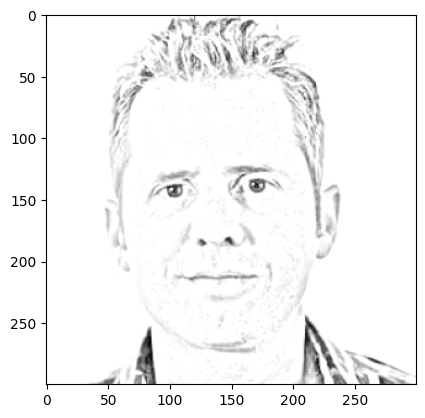

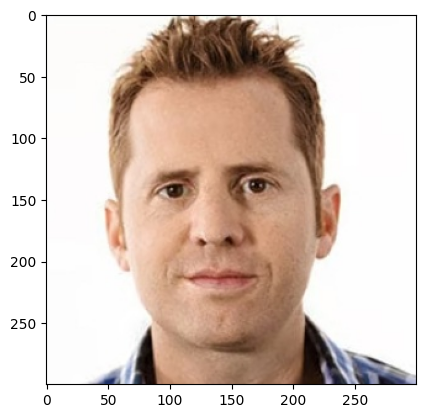

In [2]:
from matplotlib import pyplot as plt

source_image_set = 'model_input/sketches'
target_image_set = 'model_input/originals'

sample_source_image = cv2.imread(os.path.join(source_image_set, '1.jpg'), cv2.IMREAD_GRAYSCALE) # Grayscale because the images are black and white sketches
sample_target_image = cv2.cvtColor(cv2.imread(os.path.join(target_image_set, '1.jpg')), cv2.COLOR_RGB2BGR) # Images are RGB, but OpenCV reads them as BGR, so we convert them back to RGB

plt.imshow(sample_source_image, cmap='gray')
plt.show()
plt.imshow(sample_target_image)
plt.show()

# Instantiating the dataloader

In [5]:
BATCH_SIZE = 8
CONFIG = yaml.safe_load(open('config.yaml', 'r'))

dataset = CelebADataset(CONFIG)
dataloader = DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True)

# Instantiating and training the model

In [8]:
model = baseline_architecture.AutoEncoder(CONFIG)

# Training loop

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

def train(self, config=None, verbose=True):
        """
        Trains the autoencoder model on the specified dataset for the specified number of epochs,
        logging loss and evaluation metrics to Weights and Biases.
        """

        optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
        loss = baseline_architecture.PerceptualLoss()

        VALIDATION_SAMPLE_SIZE = 8
        test_X, test_Y, test_condition = dataset.get_validation_sample(VALIDATION_SAMPLE_SIZE)

        # Convert validation data to device (CPU or GPU)
        test_X = test_X.to(device)
        test_Y = test_Y.to(device)
        test_condition = test_condition.to(device)

        # Loop through each epoch
        for epoch in range(config.epochs):
            epoch_loss = 0

            # Loop through each batch in the training data
            for batch_idx, (images, conditions, targets) in enumerate(self.dataloader):
                images, targets, conditions = images.to(self.device), conditions.to(self.device), targets.to(self.device)
                optimizer.zero_grad()

                # Generate output from the autoencoder
                output_train = self.forward(images, conditions)

                # Compute the loss
                loss_train = self.loss(targets, output_train)
                epoch_loss += loss_train.item()

                # Compute gradients and update weights
                loss_train.backward()
                optimizer.step()

                if verbose:
                    print(f'Epoch: {epoch+1}/{epochs} | Batch: {batch_idx+1}/{len(dataloader)} | Loss: {loss_train.item():.4f}')

            # Compute average loss for the epoch
            epoch_loss = epoch_loss / len(dataloader)


            print(f'Epoch {epoch+1} Training Loss:   {epoch_loss}')

            # calculate validation loss and metrics
                
            with torch.no_grad():
                output_valid = model.forward(test_X, test_condition)
                loss_valid = loss(test_Y, output_valid)
                print(f'Epoch {epoch+1} Validation Loss: {loss_valid}\n')
